<a href="https://colab.research.google.com/github/ibrahimelawady/data-portfolio/blob/main/project_04_employee_attrition_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
Employee Attrition Prediction

In this project, we analyze employee attrition data to understand the key factors influencing employee turnover.  
We apply machine learning models (Logistic Regression & Random Forest) to predict attrition and provide HR insights.


### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
)
from google.colab import drive


### Load Dataset

In [5]:
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/DATA_SCIENCE_PROJECTS/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)

print(df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Preprocessing

In [6]:
# Check missing values
df.isnull().sum()

# Encode categorical features
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


### Modeling

In [7]:
X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


### Evaluation


📊 Logistic Regression Performance:
Accuracy: 0.8741496598639455
Precision: 0.6923076923076923
Recall: 0.3829787234042553
F1-score: 0.4931506849315068

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



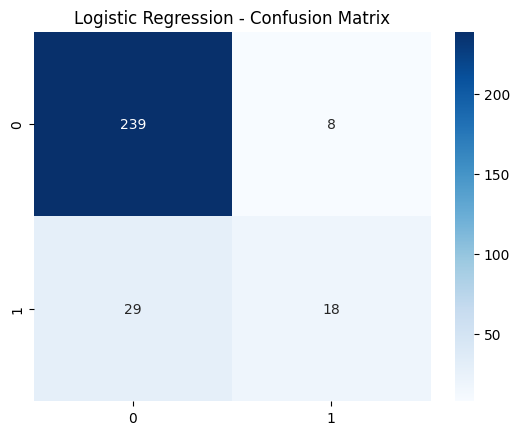


📊 Random Forest Performance:
Accuracy: 0.8299319727891157
Precision: 0.38461538461538464
Recall: 0.10638297872340426
F1-score: 0.16666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.38      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



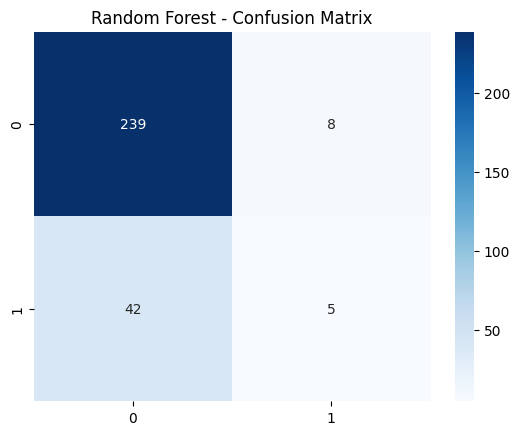

In [8]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


### Feature Importance & ROC Curve

/tmp/ipython-input-823742381.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=X.columns[indices][:15], palette="viridis")


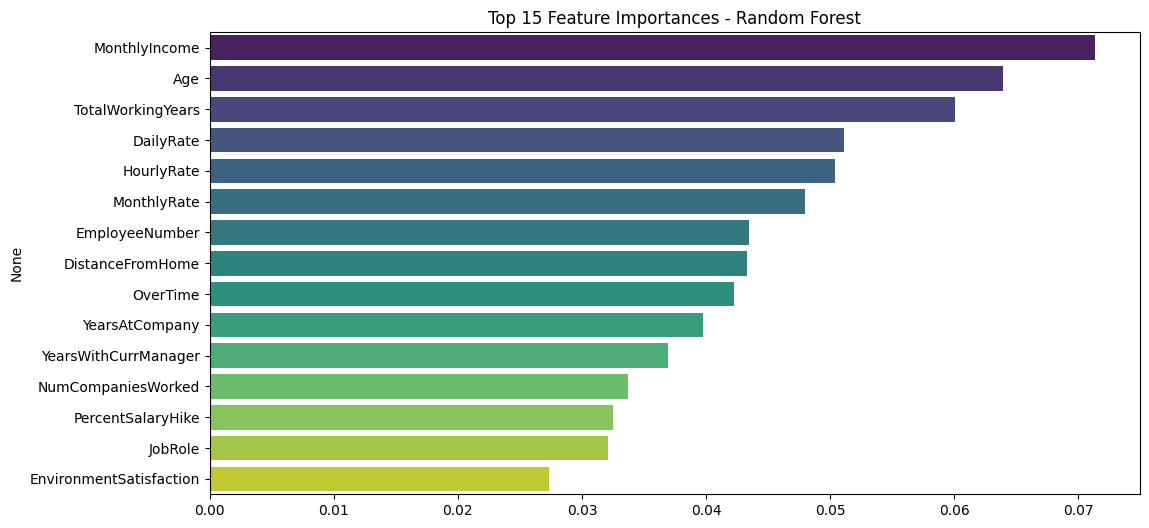

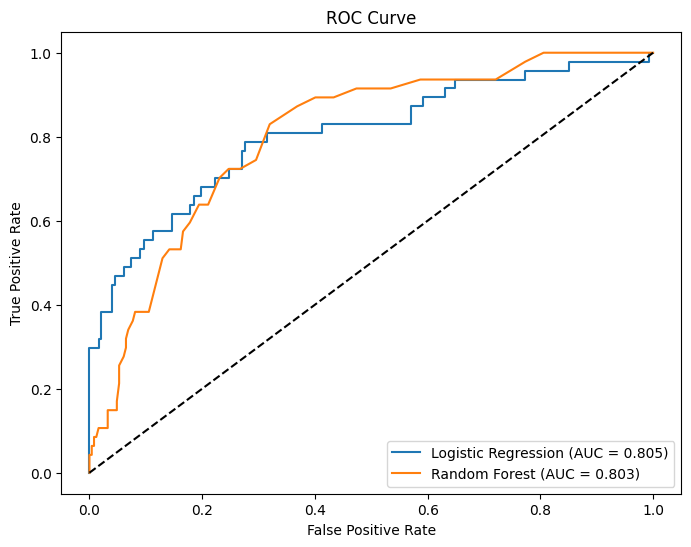

In [9]:
# Feature importance (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:15], y=X.columns[indices][:15], palette="viridis")
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()

# ROC curve
y_pred_proba_log = log_reg.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc(fpr_log, tpr_log):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


### Insights


1. Random Forest outperforms Logistic Regression with higher accuracy & ROC-AUC.
2. Key drivers of attrition include **OverTime, JobSatisfaction, Age, and MonthlyIncome**.
3. Logistic Regression provides interpretability, while Random Forest gives stronger predictive power.
4. HR can focus on reducing **overtime hours** and improving **job satisfaction** to retain employees.


/tmp/ipython-input-4203378655.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:top_n], y=X.columns[indices][:top_n], palette='viridis')


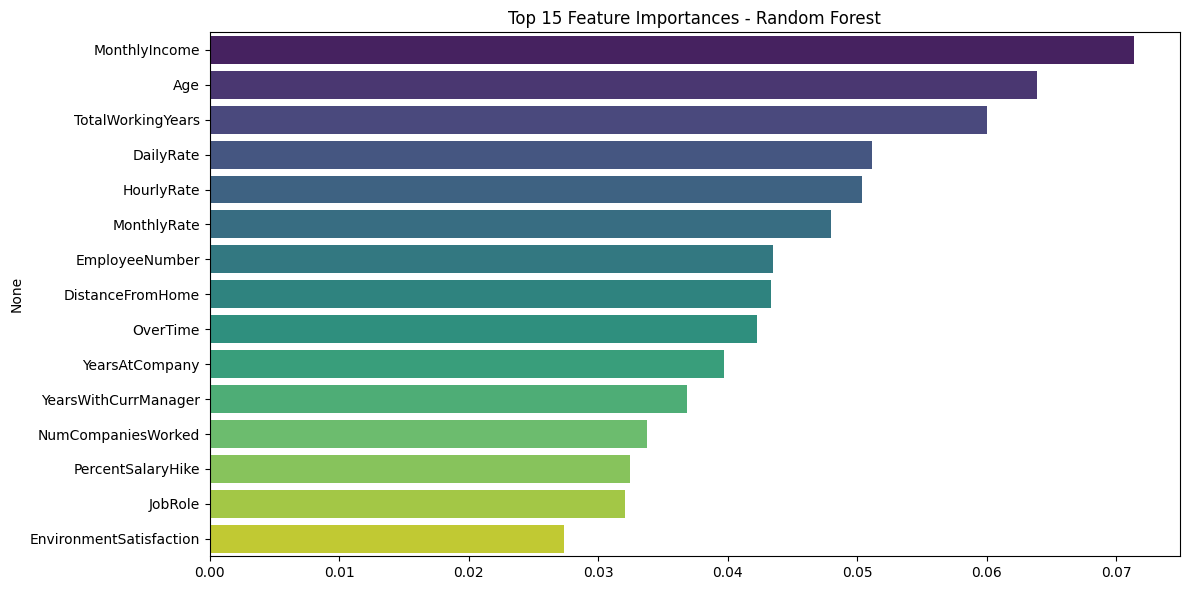

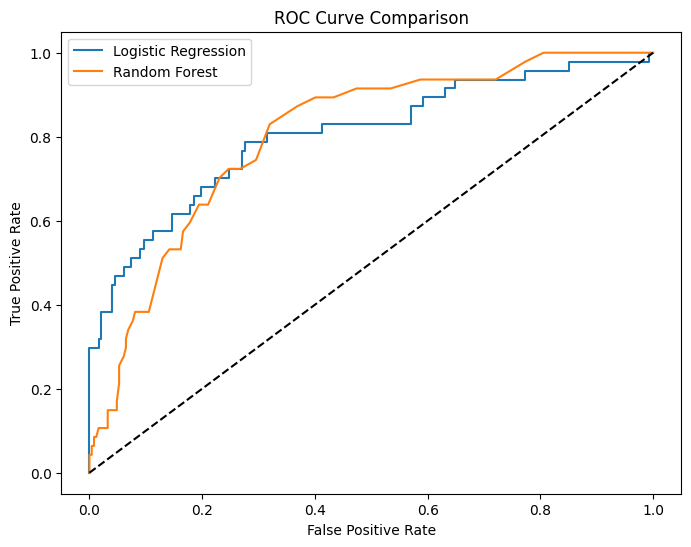

✅ Outputs saved:
 - Feature importance plot: /content/drive/MyDrive/DATA_SCIENCE_PROJECTS/project_04_employee_attrition_ml/images/feature_importances.png
 - ROC curve plot: /content/drive/MyDrive/DATA_SCIENCE_PROJECTS/project_04_employee_attrition_ml/images/roc_curve.png
 - Cleaned dataset: /content/drive/MyDrive/DATA_SCIENCE_PROJECTS/project_04_employee_attrition_ml/employee_data_cleaned.csv


In [11]:
# ----------------------------
# Step: Feature importance + ROC + save outputs
# ----------------------------

import os
from sklearn.metrics import roc_curve, auc

# where to save (Drive)
out_dir = "/content/drive/MyDrive/DATA_SCIENCE_PROJECTS/project_04_employee_attrition_ml"
images_dir = os.path.join(out_dir, "images")
os.makedirs(images_dir, exist_ok=True)

# ---- Feature importance (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 15

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices][:top_n], y=X.columns[indices][:top_n], palette='viridis')
plt.title(f"Top {top_n} Feature Importances - Random Forest")
plt.tight_layout()
feat_path = os.path.join(images_dir, "feature_importances.png")
plt.savefig(feat_path)
plt.show()

# ---- ROC Curve
y_pred_prob_log = log_reg.predict_proba(X_test)[:,1]
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
roc_path = os.path.join(images_dir, "roc_curve.png")
plt.savefig(roc_path)
plt.show()

# ---- Save cleaned dataset
cleaned_csv_path = os.path.join(out_dir, "employee_data_cleaned.csv")
df_encoded.to_csv(cleaned_csv_path, index=False)

print("✅ Outputs saved:")
print(" - Feature importance plot:", feat_path)
print(" - ROC curve plot:", roc_path)
print(" - Cleaned dataset:", cleaned_csv_path)
